In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import datetime
from sklearn.ensemble import RandomForestRegressor
##from sklearn.cross_decomposition import PLSRegression

In [4]:
##関数
def trend_fig(timestamp, y):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, y, "-", color="blue")
    #ax.plot(training_x, prediction_y,"-", color="red")
    #ax.legend(["actual","predicted"], loc="upper right")
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    #plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=0.5)
    plt.tight_layout()
    plt.show()
    return
    #os.chdir(folder_name)
    #picturename = "sin_prediction.png"
    #plt.savefig(picturename)
    #plt.clf()
    #plt.close()
    
def trend_fig_comp(timestamp, act, pre):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, act, "-", color="red", linewidth=0.5)
    ax.plot(timestamp, pre, "--", color="blue", linewidth=0.5)
    plt.ylim([0, 750])
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    plt.tight_layout()
    plt.savefig("trend.png")
    plt.show()
    return

def trend_fig_comp2(timestamp, act, pre):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, act, "-", color="red", linewidth=0.5)
    ax.plot(timestamp, pre, "--", color="blue", linewidth=0.5)
    #plt.ylim([0, 750])
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    plt.tight_layout()
    plt.savefig("trend.png")
    plt.show()
    return
    
def RF(train_x, train_y, num_tree, random_state):
    #train_x = train_x.reshape(-1, 1)
    #train_y = train_y.ravel()
    mdl = RandomForestRegressor()
    mdl.n_estimators = num_tree
    mdl.random_state = random_state
    mdl.fit(train_x, train_y)
    return mdl

def error_cal(act, pre):
    abs_error = np.abs(act - pre)
    rel_error = abs_error / act
    MAPE = rel_error.mean()
    RMSE = (abs_error**2).mean()**0.5
    return MAPE, RMSE

In [5]:
##幹線データの読み取り
# data_set = pd.read_excel("/home/studio-lab-user/Sewage-trunk-line/truckline/data/幹線データ.xlsx", sheet_name="2018年7月~2020年12月")
data_set = pd.read_excel("/root/truckline/data/幹線データ.xlsx", sheet_name="2018年7月~2020年12月")

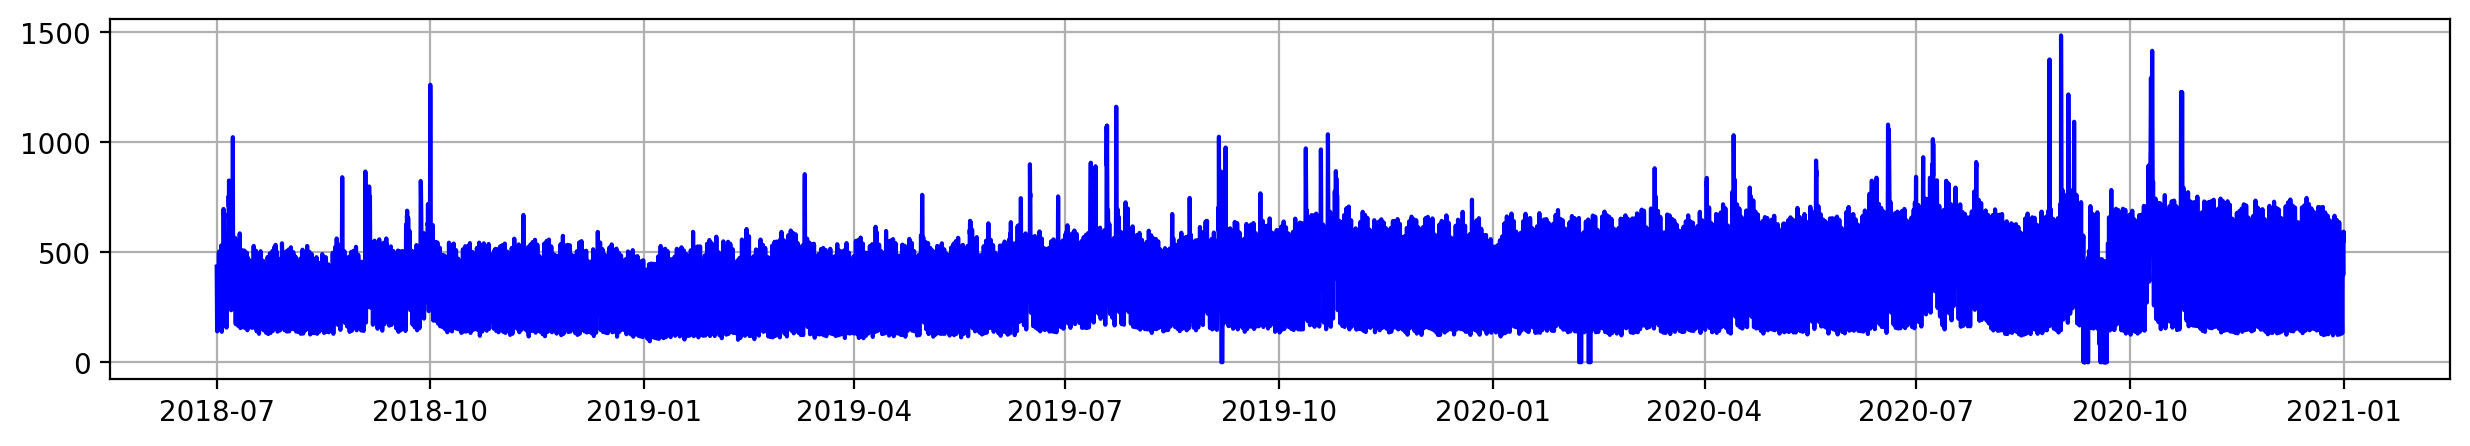

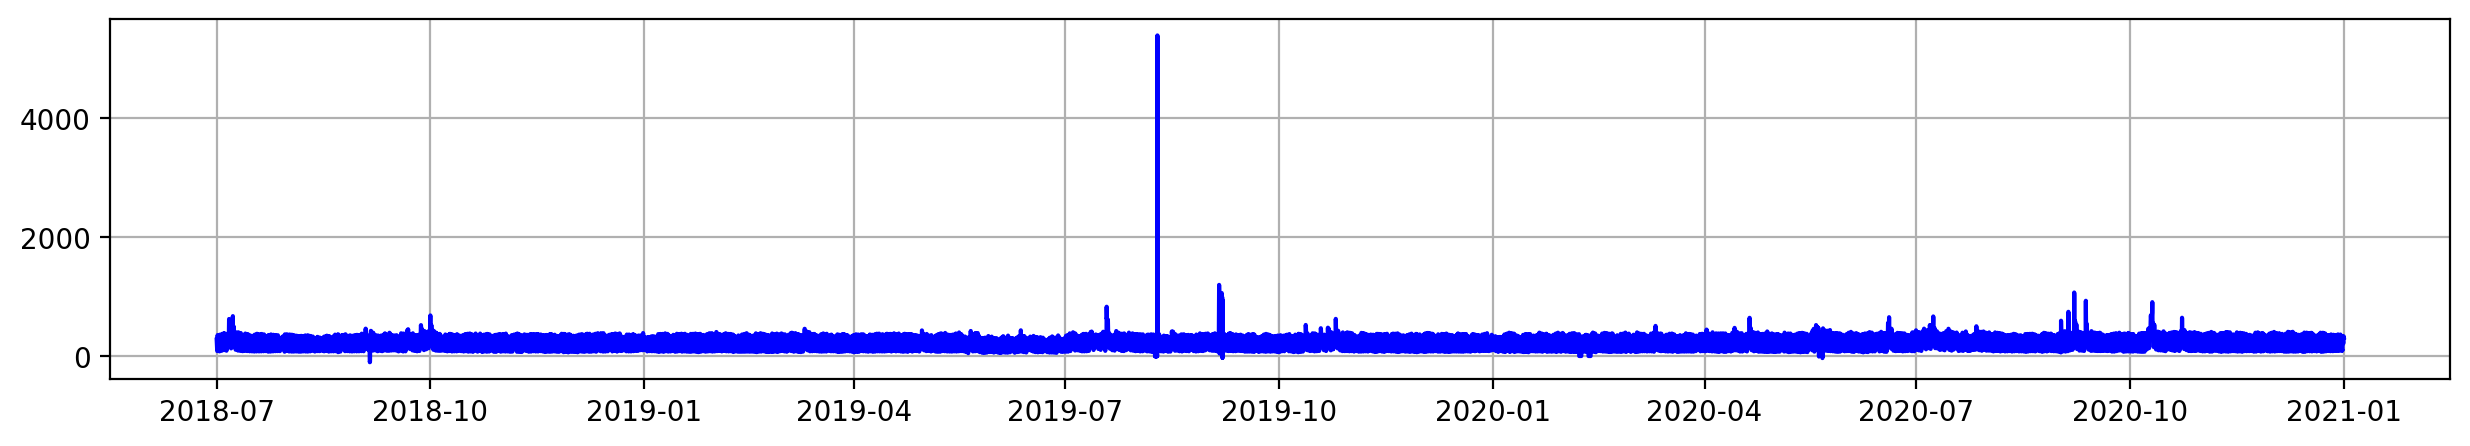

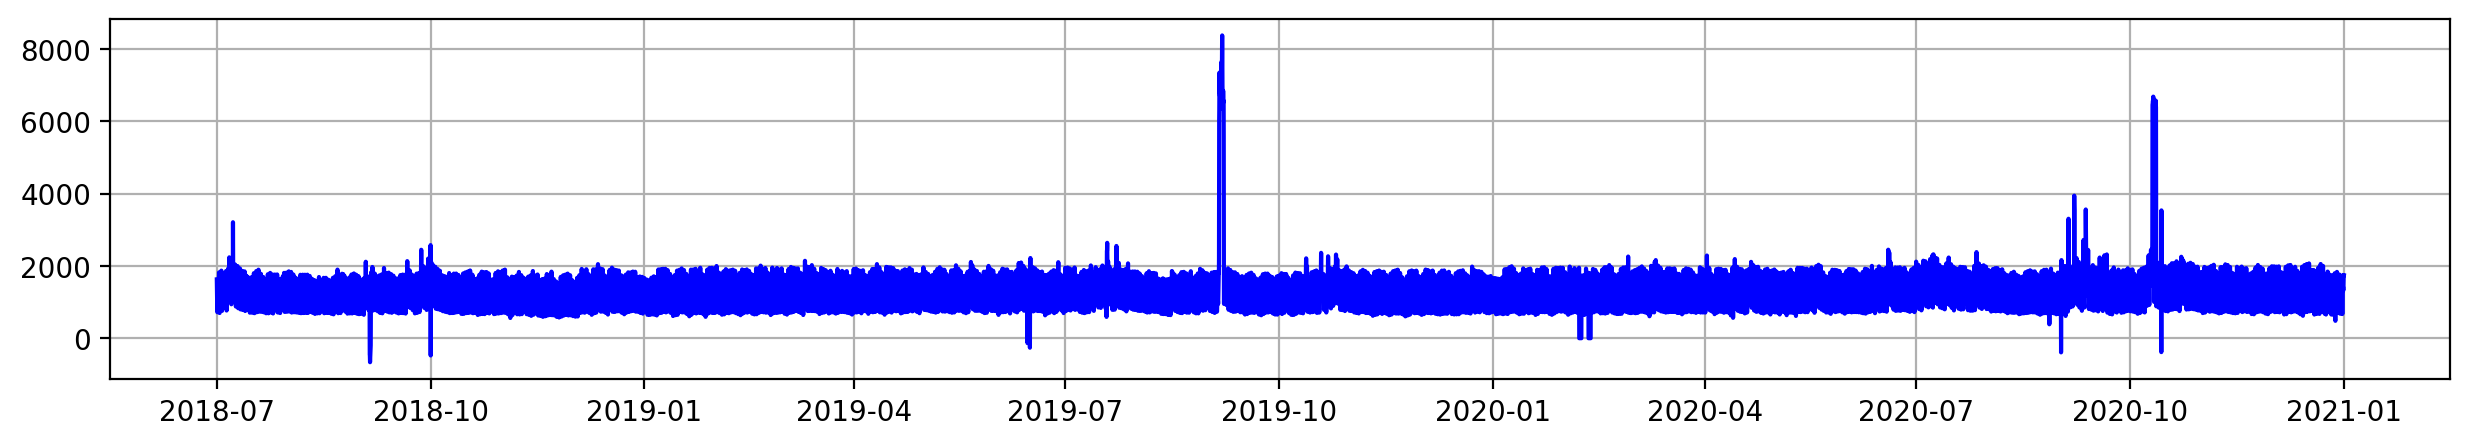

In [6]:
#各市の幹線流量
data_city = pd.DataFrame(data_set.iloc[(np.arange(5,len(data_set))),[0,14,15,16]])\
.rename(columns={"Unnamed: 0":"timestamp"}).reset_index().drop("index", axis=1)
data_city.head
data_city["timestamp"] = data_city["timestamp"].dt.round("min")
#市の幹線流量のトレンド確認
trend_fig(data_city.timestamp, data_city.亀山市.array)
trend_fig(data_city.timestamp, data_city.四日市市.array)
trend_fig(data_city.timestamp, data_city.鈴鹿市.array)

In [7]:
##気象実績データの読み取り
# home = "/home/studio-lab-user/"
# weather_path = home + "Sewage-trunk-line/data/気温・降雨量・湿度データ（四日市、亀山、鈴鹿）.xlsx"
weather_path = "/root/truckline/data/気温・降雨量・湿度データ（四日市、亀山、鈴鹿）.xlsx"
weather_temp = pd.read_excel(weather_path, sheet_name="気温")
weather_rain = pd.read_excel(weather_path, sheet_name="降雨量")
weather_hum = pd.read_excel(weather_path, sheet_name="湿度（四日市のみ）")

weather_temp = weather_temp.iloc[(np.arange(5,len(weather_temp))), [0,1,4,7]].reset_index().drop("index", axis=1)
weather_temp.columns = ["timestamp", "四日市市", "亀山市", "鈴鹿市"]
weather_rain = weather_rain.iloc[(np.arange(5,len(weather_rain))), [0,1,5,8]].reset_index().drop("index", axis=1)
weather_rain.columns = ["timestamp", "四日市市", "亀山市", "鈴鹿市"]
weather_hum = weather_hum.iloc[(np.arange(5,len(weather_hum))), [0,1]].reset_index().drop("index", axis=1)
weather_hum.columns = ["timestamp", "四日市市"]

In [8]:
##時刻ステップ
datetime.time()
data_city.timestamp.dt.hour
timestep = np.asarray(data_city.timestamp.dt.hour)

In [9]:
##気象予報データの読み取り
# temp_path = home + "Sewage-trunk-line/truckline/data/予報データ（気温）_12 intervals.xlsx"
# rain_path = home + "Sewage-trunk-line/truckline/data/予報データ（降水量）_12 intervals.xlsx"
# hum_path = home + "Sewage-trunk-line/truckline/data/予報データ（湿度）_12 intervals.xlsx"
temp_path = "/root/truckline/data/予報データ（気温）_12 intervals.xlsx"
rain_path = "/root/truckline/data/予報データ（降水量）_12 intervals.xlsx"
hum_path = "/root/truckline/data/予報データ（湿度）_12 intervals.xlsx"
sheet_name_temp = ["201905-201909_気温連続データ", "202005-202009_気温連続データ"]
sheet_name_rain = ["201905-201909_降水量連続データ", "202005-202009_降水量連続データ"]
sheet_name_hum = ["201905-201909_湿度連続データ", "202005-202009_湿度連続データ"]
temp_set_a = pd.read_excel(temp_path, sheet_name=sheet_name_temp[0]).drop("予報基準時刻", axis=1)
rain_set_a = pd.read_excel(rain_path, sheet_name=sheet_name_rain[0]).drop("予報基準時刻", axis=1)
hum_set_a = pd.read_excel(hum_path, sheet_name=sheet_name_hum[0]).drop("予報基準時刻", axis=1)
temp_set_b = pd.read_excel(temp_path, sheet_name=sheet_name_temp[1]).drop("予報基準時刻", axis=1)
rain_set_b = pd.read_excel(rain_path, sheet_name=sheet_name_rain[1]).drop("予報基準時刻", axis=1)
hum_set_b = pd.read_excel(hum_path, sheet_name=sheet_name_hum[1]).drop("予報基準時刻", axis=1)

In [186]:
#条件
city = '四日市市'
ver = 2 # a:1, b:2
if ver == 1:
    #array_nan1 = np.asarray(temp_set_a.index[~temp_set_a.fillna("nan").applymap(np.isreal).all(1)])
    #array_nan2 = np.asarray(rain_set_a.index[~rain_set_a.fillna("nan").applymap(np.isreal).all(1)])
    #array_nan3 = np.asarray(hum_set_a.index[~hum_set_a.fillna("nan").applymap(np.isreal).all(1)])
    #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
    #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
    test_time = temp_set_a.予報日.dt.round("min")
    temp_set = temp_set_a
    hum_set = hum_set_a
    rain_set = rain_set_a
else:
    #array_nan1 = np.asarray(temp_set_b.index[~temp_set_b.fillna("nan").applymap(np.isreal).all(1)])
    #array_nan2 = np.asarray(rain_set_b.index[~rain_set_b.fillna("nan").applymap(np.isreal).all(1)])
    #array_nan3 = np.asarray(hum_set_b.index[~hum_set_b.fillna("nan").applymap(np.isreal).all(1)])
    #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
    #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
    test_time = temp_set_b.予報日.dt.round("min")
    temp_set = temp_set_b
    hum_set = hum_set_b
    rain_set = rain_set_b

In [187]:
##過去の降雨量の作成 実績
hum_old1 = pd.DataFrame()
hum_old2 = pd.DataFrame()
hum_old3 = pd.DataFrame()
rain_old1 = pd.DataFrame()
rain_old2 = pd.DataFrame()
rain_old3 = pd.DataFrame()
day_num = 24
i = 0
#ver = 2
for i in np.arange(day_num):
    #hum_ = pd.DataFrame(np.tile([np.nan, np.nan, np.nan],(i+1,1)), 
                       #columns=["亀山市","四日市市","鈴鹿市"]).append(train_X.iloc[:, [4,5,6]]).reset_index().drop(columns="index")
    hum_ = pd.DataFrame(np.tile([0, 0, 0],(i+1,1)), 
                       columns=[("亀山市"),("四日市市"),("鈴鹿市")]).append(weather_rain.iloc[:, [2,1,3]]).reset_index().drop(columns="index")
    hum__ = hum_.iloc[0:-(1+i), :]
    hum__.columns = ['降雨量亀山市', '降雨量四日市市', '降雨量鈴鹿市']
    hum_old1 = pd.concat([hum_old1, hum__.iloc[:, 1]], axis=1)
    hum_old2 = pd.concat([hum_old2, hum__.iloc[:, 0]], axis=1)
    hum_old3 = pd.concat([hum_old3, hum__.iloc[:, 2]], axis=1)
for i in np.arange(day_num):
    rain_ = pd.DataFrame(np.tile([0, 0, 0],(i+1,1)), 
                       columns=[("予報値_亀山市"),("予報値_四日市市"),("予報値_鈴鹿市")]).append(rain_set.iloc[:, [1,2,3]]).reset_index().drop(columns="index")
    rain__ = rain_.iloc[0:-(1+i), :]
    rain__.columns = ['降雨量亀山市', '降雨量四日市市', '降雨量鈴鹿市']
    rain_old1 = pd.concat([rain_old1, rain__.iloc[:, 1]], axis=1)
    rain_old2 = pd.concat([rain_old2, rain__.iloc[:, 0]], axis=1)
    rain_old3 = pd.concat([rain_old3, rain__.iloc[:, 2]], axis=1)
##過去の降雨量の作成 予報
# hum_past1 = pd.DataFrame()
# hum_past2 = pd.DataFrame()
# hum_past3 = pd.DataFrame()
# day_num = 24
# i = 0
# for i in np.arange(day_num):
#     #hum_ = pd.DataFrame(np.tile([np.nan, np.nan, np.nan],(i+1,1)), 
#                        #columns=["亀山市","四日市市","鈴鹿市"]).append(train_X.iloc[:, [4,5,6]]).reset_index().drop(columns="index")
#     hum_ = pd.DataFrame(np.tile([0, 0, 0],(i+1,1)), 
#                        columns=[("亀山市"),("四日市市"),("鈴鹿市")]).append(hum_set_a.iloc[:, [2,1,3]]).reset_index().drop(columns="index")
#     hum__ = hum_.iloc[0:-(1+i), :]
#     hum__.columns = ['降雨量亀山市', '降雨量四日市市', '降雨量鈴鹿市']
#     hum_past1 = pd.concat([hum_past1, hum__.iloc[:, 1]], axis=1)
#     hum_past2 = pd.concat([hum_past2, hum__.iloc[:, 0]], axis=1)
#     hum_past3 = pd.concat([hum_past3, hum__.iloc[:, 2]], axis=1)

,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,...,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市,降雨量鈴鹿市
1,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6,0.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.6,0.5,0.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.3,0.2,0.6,0.5,0.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.6,0.3,0.2,0.6,0.5,0.7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.3,0.6,0.3,0.2,0.6,0.5,0.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.3,0.6,0.3,0.2,0.6,0.5,0.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.3,0.6,0.3,0.2,0.6,0.5,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.3,0.6,0.3,0.2,0.6,0.5,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
test_time = temp_set_a.予報日.dt.round("min")
temp_set = temp_set_a
hum_set = hum_set_a
rain_set = rain_set_a
test_X = pd.concat([temp_set,
                rain_set.drop(["予報日"], axis=1),
                hum_set.drop(["予報日"], axis=1), 
                pd.DataFrame(timestep)[(data_city.timestamp >= test_time[0]) & (data_city.timestamp <= test_time[len(test_time)-1])].reset_index().drop(columns="index")],axis=1)
test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[0]) & (data_city.timestamp <= test_time[len(test_time)-1])].reset_index().drop(columns="index")], axis=1)
test_X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,予報日,予報値_鈴鹿市,予報値_鈴鹿市,予報値_四日市市,0
0,2019-05-01 10:00:00.000000,16.7,0.7,93,10
1,2019-05-01 11:00:00.000000,17.0,0.5,92,11
2,2019-05-01 11:59:59.999999,17.2,0.6,92,12
3,2019-05-01 12:59:59.999999,17.9,0.2,88,13
4,2019-05-01 13:59:59.999999,17.9,0.3,87,14
...,...,...,...,...,...
3667,2019-10-01 04:59:59.999850,23.6,0.1,95,5
3668,2019-10-01 05:59:59.999850,22.7,0.1,95,6
3669,2019-10-01 06:59:59.999850,23.5,0.0,94,7
3670,2019-10-01 07:59:59.999849,24.4,0.1,91,8


In [59]:
rain_old1

,降雨量四日市市
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3619,0.2
3620,0.2
3621,0.2
3622,0.1


In [117]:
rain_set

,予報日,予報値_亀山市,予報値_四日市市,予報値_鈴鹿市,実績値_亀山市,実績値_四日市市,実績値_鈴鹿市
0,2019-05-01 10:00:00.000000,0.7,0.7,0.7,0.0,0.0,1.0
1,2019-05-01 11:00:00.000000,0.4,0.6,0.5,0.0,0.0,0.0
2,2019-05-01 11:59:59.999999,0.5,0.6,0.6,0.5,0.0,0.0
3,2019-05-01 12:59:59.999999,0.2,0.2,0.2,0.5,0.5,0.0
4,2019-05-01 13:59:59.999999,0.4,0.2,0.3,1.0,1.0,0.5
...,...,...,...,...,...,...,...
3667,2019-10-01 04:59:59.999850,0.1,0.1,0.1,0.0,0.0,0.0
3668,2019-10-01 05:59:59.999850,0.0,0.1,0.1,0.0,0.0,0.0
3669,2019-10-01 06:59:59.999850,0.0,0.0,0.0,0.0,0.0,0.0
3670,2019-10-01 07:59:59.999849,0.1,0.0,0.1,0.0,0.0,0.0


In [100]:
##過去の降雨量：実績値を使用
##学習・検証期間の設定
#評価期間a：2019年5月1日 ～ 2019年10月1日
#評価期間b：2020年5月1日 ～ 2020年9月29日
#09:00:00と21:00:00で1日2回学習、予測
#学習において、09:00:00、21:00:00以外の時刻では、過去の降雨量の学習用データは予報値を使う。
#まずは、鈴鹿のみ
import warnings
warnings.simplefilter('ignore')
#条件
# city = '鈴鹿'
# ver = 2 # a:1, b:2
# if ver == 1:
#     #array_nan1 = np.asarray(temp_set_a.index[~temp_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan2 = np.asarray(rain_set_a.index[~rain_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan3 = np.asarray(hum_set_a.index[~hum_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
#     #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
#     test_time = temp_set_a.予報日.dt.round("min")
#     temp_set = temp_set_a
#     hum_set = hum_set_a
#     rain_set = rain_set_a
# else:
#     #array_nan1 = np.asarray(temp_set_b.index[~temp_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan2 = np.asarray(rain_set_b.index[~rain_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan3 = np.asarray(hum_set_b.index[~hum_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
#     #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
#     test_time = temp_set_b.予報日.dt.round("min")
#     temp_set = temp_set_b
#     hum_set = hum_set_b
#     rain_set = rain_set_b

j = 0
train_X = []
train_Y = []
pre9 = []
pre21 = []
pre = []
time9 = []
time21 = []
time_ = []
for i in range(len(test_time)):
#for i in range(50, 100):
    if test_time.dt.time[i] == datetime.time(9, 0): # 9時
        print(test_time[i])
        # 学習データ
        train_Y = data_city[data_city.timestamp < test_time[i]]
        train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time[i]]],axis=1)
        train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
        if i + 12 <= len(test_time):
            # test_X = pd.concat([weather_temp[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])],
            #                 weather_rain[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1),
            #                 weather_hum[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1), 
            #                 pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]],axis=1)
            # test_X = pd.concat([test_X.iloc[:, [0,3,6,7,8]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]], axis=1)
            test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
                    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
                    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
                    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
            test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)
            if city == '鈴鹿':
                train_X = pd.concat([train_X.iloc[:, [0,3,6,7,8]], hum_old3[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","鈴鹿市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1), Y.鈴鹿市, 300, 100)
                # 予測 20時まで
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre9 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre9 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre9 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                time9 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time9)
    elif test_time.dt.time[i] == datetime.time(21, 0):
        print(test_time[i])
        # 学習データ
        train_Y = data_city[data_city.timestamp < test_time[i]]
        train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time[i]]],axis=1)
        train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
        if i + 12 <= len(test_time):
            # test_X = pd.concat([weather_temp[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])],
            #                 weather_rain[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1),
            #                 weather_hum[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1), 
            #                 pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]],axis=1)
            # test_X = pd.concat([test_X.iloc[:, [0,3,6,7,8]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]], axis=1)
            test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
                    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
                    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
                    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
            test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)
            if city == '鈴鹿':
                train_X = pd.concat([train_X.iloc[:, [0,3,6,7,8]], hum_old3[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","鈴鹿市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.鈴鹿市, 300, 100)
                # 予測 20時まで
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre21 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre_ = np.concatenate([pre9, pre21], 0)
                pre = np.concatenate([pre, pre_], 0)
                time21 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time21)
act = data_city.鈴鹿市[np.in1d(data_city.timestamp, pd.to_datetime(time_))]
pd.DataFrame(time_).to_csv("test_time_b_no.csv")
pd.DataFrame(pre).to_csv("pre_b_no.csv")
act.to_csv("act_b_no.csv")
rain_b = weather_rain[np.in1d(pd.to_datetime(weather_rain.timestamp), pd.to_datetime(time_))].鈴鹿市
rain_b.to_csv("rain_b_no.csv")

2019-05-01 21:00:00
2019-05-01 20:59:59.999997 2019-05-02 07:59:59.999995
2019-05-02 09:00:00


KeyboardInterrupt: 

In [188]:
##過去の降雨量：予報値を使用
##学習・検証期間の設定
#評価期間a：2019年5月1日 ～ 2019年10月1日
#評価期間b：2020年5月1日 ～ 2020年9月29日
#09:00:00と21:00:00で1日2回学習、予測
#学習において、09:00:00、21:00:00以外の時刻では、過去の降雨量の学習用データは予報値を使う。
#まずは、鈴鹿のみ
city = '四日市市'
import warnings
warnings.simplefilter('ignore')
#条件
# city = '鈴鹿'
# ver = 2 # a:1, b:2
# if ver == 1:
#     #array_nan1 = np.asarray(temp_set_a.index[~temp_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan2 = np.asarray(rain_set_a.index[~rain_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan3 = np.asarray(hum_set_a.index[~hum_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
#     #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
#     test_time = temp_set_a.予報日.dt.round("min")
#     temp_set = temp_set_a
#     hum_set = hum_set_a
#     rain_set = rain_set_a
# else:
#     #array_nan1 = np.asarray(temp_set_b.index[~temp_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan2 = np.asarray(rain_set_b.index[~rain_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan3 = np.asarray(hum_set_b.index[~hum_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
#     #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
#     test_time = temp_set_b.予報日.dt.round("min")
#     temp_set = temp_set_b
#     hum_set = hum_set_b
#     rain_set = rain_set_b

j = 0
train_X = []
train_Y = []
pre9 = []
pre21 = []
pre = []
time9 = []
time21 = []
time_ = []
for i in range(len(test_time)):
#for i in range(50, 100):
    if test_time.dt.time[i] == datetime.time(9, 0): # 9時
        print(test_time[i])
        # 学習データ
        train_Y = data_city[data_city.timestamp < test_time[i]]
        train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time[i]]],axis=1)
        train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
        if i + 12 <= len(test_time):
            # test_X = pd.concat([weather_temp[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])],
            #                 weather_rain[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1),
            #                 weather_hum[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1), 
            #                 pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]],axis=1)
            # test_X = pd.concat([test_X.iloc[:, [0,3,6,7,8]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]], axis=1)
            test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
                    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
                    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
                    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
            #test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)
            #test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], rain_old3.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
            if city == '鈴鹿':
                train_X = pd.concat([train_X.iloc[:, [0,3,6,7,8]], hum_old3[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","鈴鹿市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1), Y.鈴鹿市, 300, 100)
                # 予測 20時まで
                test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], rain_old3.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre9 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre9 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre9 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                time9 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time9)
            elif city == '亀山':
                train_X = pd.concat([train_X.iloc[:, [0,2,5,7,8]], hum_old2[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","亀山市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.亀山市, 300, 100)
                # 予測 20時まで
                test_X = pd.concat([test_X.iloc[:, [0,1,7,14,17]], rain_old2.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre9 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                time9 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time9)
            else:
                train_X = pd.concat([train_X.iloc[:, [0,1,4,7,8]], hum_old1[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","四日市市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.四日市市, 300, 100)
                # 予測 20時まで
                test_X = pd.concat([test_X.iloc[:, [0,2,8,14,17]], rain_old1.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre9 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                time9 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time9)
    elif test_time.dt.time[i] == datetime.time(21, 0):
        print(test_time[i])
        # 学習データ
        train_Y = data_city[data_city.timestamp < test_time[i]]
        train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time[i]]],axis=1)
        train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
        if i + 12 <= len(test_time):
            # test_X = pd.concat([weather_temp[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])],
            #                 weather_rain[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1),
            #                 weather_hum[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1), 
            #                 pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]],axis=1)
            # test_X = pd.concat([test_X.iloc[:, [0,3,6,7,8]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]], axis=1)
            test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
                    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
                    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
                    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
            #test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)
            #test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], rain_old3.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
            if city == '鈴鹿':
                train_X = pd.concat([train_X.iloc[:, [0,3,6,7,8]], hum_old3[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","鈴鹿市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.鈴鹿市, 300, 100)
                # 予測 20時まで
                test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], rain_old3.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre21 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre_ = np.concatenate([pre9, pre21], 0)
                pre = np.concatenate([pre, pre_], 0)
                time21 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time21)
            elif city == '亀山':
                train_X = pd.concat([train_X.iloc[:, [0,2,5,7,8]], hum_old2[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","亀山市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.亀山市, 300, 100)
                # 予測 20時まで
                test_X = pd.concat([test_X.iloc[:, [0,1,7,14,17]], rain_old2.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre21 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre_ = np.concatenate([pre9, pre21], 0)
                pre = np.concatenate([pre, pre_], 0)
                time21 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time21)
            else:
                train_X = pd.concat([train_X.iloc[:, [0,1,4,7,8]], hum_old1[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","四日市市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.四日市市, 300, 100)
                # 予測 20時まで
                test_X = pd.concat([test_X.iloc[:, [0,2,8,14,17]], rain_old1.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre21 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre_ = np.concatenate([pre9, pre21], 0)
                pre = np.concatenate([pre, pre_], 0)
                time21 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time21)
# act = data_city.鈴鹿市[np.in1d(data_city.timestamp, pd.to_datetime(time_))]
# pd.DataFrame(time_).to_csv("/root/truckline/result/予報値予測/test_time_a.csv")
# pd.DataFrame(pre).to_csv("/root/truckline/result/予報値予測/pre_a.csv")
# act.to_csv("/root/truckline/result/予報値予測/act_a.csv")
# rain_b = weather_rain[np.in1d(pd.to_datetime(weather_rain.timestamp), pd.to_datetime(time_))].鈴鹿市
# rain_b.to_csv("/root/truckline/result/予報値予測/rain_a.csv")
# rain_set.to_csv("/root/truckline/result/予報値予測/rain_for_a.csv")

2020-05-01 21:00:00
2020-05-01 20:59:59.999997 2020-05-02 07:59:59.999995
2020-05-02 09:00:00
2020-05-02 08:59:59.999995 2020-05-02 19:59:59.999993
2020-05-02 08:59:59.999995 2020-05-02 19:59:59.999993
2020-05-02 21:00:00
2020-05-02 20:59:59.999992 2020-05-03 07:59:59.999990
2020-05-03 09:00:00
2020-05-03 08:59:59.999990 2020-05-03 19:59:59.999988
2020-05-03 08:59:59.999990 2020-05-03 19:59:59.999988
2020-05-03 21:00:00
2020-05-03 20:59:59.999987 2020-05-04 07:59:59.999985
2020-05-04 09:00:00
2020-05-04 08:59:59.999985 2020-05-04 19:59:59.999983
2020-05-04 08:59:59.999985 2020-05-04 19:59:59.999983
2020-05-04 21:00:00
2020-05-04 20:59:59.999982 2020-05-05 07:59:59.999980
2020-05-05 09:00:00
2020-05-05 08:59:59.999980 2020-05-05 19:59:59.999978
2020-05-05 08:59:59.999980 2020-05-05 19:59:59.999978
2020-05-05 21:00:00
2020-05-05 20:59:59.999977 2020-05-06 07:59:59.999975
2020-05-06 09:00:00
2020-05-06 08:59:59.999975 2020-05-06 19:59:59.999973
2020-05-06 08:59:59.999975 2020-05-06 19:59:

In [189]:
act = data_city.四日市市[np.in1d(data_city.timestamp, pd.to_datetime(time_))]
pd.DataFrame(time_).to_csv("/root/truckline/result/四日市市/test_time_b.csv")
pd.DataFrame(pre).to_csv("/root/truckline/result/四日市市/pre_b.csv")
act.to_csv("/root/truckline/result/四日市市/act_b.csv")
# rain_b = weather_rain[np.in1d(pd.to_datetime(weather_rain.timestamp), pd.to_datetime(time_))].亀山
# rain_b.to_csv("/root/truckline/result/予報値予測/rain_a.csv")
rain_set.to_csv("/root/truckline/result/四日市市/rain_for_b.csv")

In [175]:
test_X

,予報日,予報値_亀山市,予報値_亀山市,予報値_四日市市,0,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,...,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市,降雨量亀山市
0,2020-09-28 20:59:59.999862,18.3,0.0,88,21,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-09-28 21:59:59.999861,16.9,0.0,90,22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-09-28 22:59:59.999861,16.5,0.0,91,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-09-28 23:59:59.999861,16.2,0.0,92,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-09-29 00:59:59.999861,16.2,0.0,92,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-09-29 01:59:59.999861,16.3,0.0,92,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-09-29 02:59:59.999860,17.0,0.0,93,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-09-29 03:59:59.999860,18.1,0.2,93,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-09-29 04:59:59.999860,18.1,0.3,93,5,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2020-09-29 05:59:59.999860,17.7,0.3,92,6,0.3,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##亀山
##過去の降雨量：予報値
##学習・検証期間の設定
#評価期間a：2019年5月1日 ～ 2019年10月1日
#評価期間b：2020年5月1日 ～ 2020年9月29日
#09:00:00と21:00:00で1日2回学習、予測
#学習において、09:00:00、21:00:00以外の時刻では、過去の降雨量の学習用データは予報値を使う。
#まずは、鈴鹿のみ
import warnings
warnings.simplefilter('ignore')
#条件
# city = '鈴鹿'
# ver = 2 # a:1, b:2
# if ver == 1:
#     #array_nan1 = np.asarray(temp_set_a.index[~temp_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan2 = np.asarray(rain_set_a.index[~rain_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan3 = np.asarray(hum_set_a.index[~hum_set_a.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
#     #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
#     test_time = temp_set_a.予報日.dt.round("min")
#     temp_set = temp_set_a
#     hum_set = hum_set_a
#     rain_set = rain_set_a
# else:
#     #array_nan1 = np.asarray(temp_set_b.index[~temp_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan2 = np.asarray(rain_set_b.index[~rain_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan3 = np.asarray(hum_set_b.index[~hum_set_b.fillna("nan").applymap(np.isreal).all(1)])
#     #array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
#     #test_time = temp_set_a.drop(index=array_nan).予報日.dt.round("min")
#     test_time = temp_set_b.予報日.dt.round("min")
#     temp_set = temp_set_b
#     hum_set = hum_set_b
#     rain_set = rain_set_b

j = 0
train_X = []
train_Y = []
pre9 = []
pre21 = []
pre = []
time9 = []
time21 = []
time_ = []
for i in range(len(test_time)):
#for i in range(50, 100):
    if test_time.dt.time[i] == datetime.time(9, 0): # 9時
        print(test_time[i])
        # 学習データ
        train_Y = data_city[data_city.timestamp < test_time[i]]
        train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time[i]]],axis=1)
        train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
        if i + 12 <= len(test_time):
            # test_X = pd.concat([weather_temp[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])],
            #                 weather_rain[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1),
            #                 weather_hum[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1), 
            #                 pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]],axis=1)
            # test_X = pd.concat([test_X.iloc[:, [0,3,6,7,8]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]], axis=1)
            test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
                    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
                    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
                    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
            #test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)
            test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], rain_old3.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
            if city == '鈴鹿':
                train_X = pd.concat([train_X.iloc[:, [0,3,6,7,8]], hum_old3[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","鈴鹿市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1), Y.鈴鹿市, 300, 100)
                # 予測 20時まで
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre9 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre9 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre9 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                time9 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time9)
    elif test_time.dt.time[i] == datetime.time(21, 0):
        print(test_time[i])
        # 学習データ
        train_Y = data_city[data_city.timestamp < test_time[i]]
        train_X = pd.concat([weather_temp[data_city.timestamp < test_time[i]],
                        weather_rain[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1),
                        weather_hum[data_city.timestamp < test_time[i]].drop(["timestamp"], axis=1), 
                        pd.DataFrame(timestep)[data_city.timestamp < test_time[i]]],axis=1)
        train_X.columns = ["timestamp","気温四日市市","気温亀山市","気温鈴鹿市","降雨量四日市市","降雨量亀山市","降雨量鈴鹿市","湿度四日市市","timestep"]
        if i + 12 <= len(test_time):
            # test_X = pd.concat([weather_temp[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])],
            #                 weather_rain[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1),
            #                 weather_hum[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].drop(["timestamp"], axis=1), 
            #                 pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]],axis=1)
            # test_X = pd.concat([test_X.iloc[:, [0,3,6,7,8]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])]], axis=1)
            test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
                    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
                    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
                    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
            #test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)
            test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], rain_old3.iloc[i:i+12, :].reset_index().drop(columns="index")], axis=1)
            if city == '鈴鹿':
                train_X = pd.concat([train_X.iloc[:, [0,3,6,7,8]], hum_old3[data_city.timestamp < test_time[i]]], axis=1)
                train_Y = train_Y.loc[:, ["timestamp","鈴鹿市"]]
                # 学習
                Y = train_Y.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                X = train_X.drop(index=np.asarray(train_X.index[~train_X.fillna("nan").applymap(np.isreal).all(1)]))
                mdl = RF(X.drop(["timestamp"], axis=1),Y.鈴鹿市, 300, 100)
                # 予測 20時まで
                #test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)]))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1))
                #pre21 = mdl.predict(test_X.drop(["timestamp"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                print(test_X.予報日[0], test_X.予報日[len(test_X)-1])
                pre21 = mdl.predict(test_X.drop(["予報日"], axis=1).drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])))
                pre_ = np.concatenate([pre9, pre21], 0)
                pre = np.concatenate([pre, pre_], 0)
                time21 = pd.to_datetime(test_X.drop(index=np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])).予報日.dt.round("min"))
                time_.extend(time21)
act = data_city.鈴鹿市[np.in1d(data_city.timestamp, pd.to_datetime(time_))]
pd.DataFrame(time_).to_csv("/root/truckline/result/予報値予測/test_time_a.csv")
pd.DataFrame(pre).to_csv("/root/truckline/result/予報値予測/pre_a.csv")
act.to_csv("/root/truckline/result/予報値予測/act_a.csv")
rain_b = weather_rain[np.in1d(pd.to_datetime(weather_rain.timestamp), pd.to_datetime(time_))].鈴鹿市
rain_b.to_csv("/root/truckline/result/予報値予測/rain_a.csv")
rain_set.to_csv("/root/truckline/result/予報値予測/rain_for_a.csv")

In [144]:
if city == '鈴鹿':
    print('a')

a


In [290]:
rain_b = weather_rain[np.in1d(pd.to_datetime(weather_rain.timestamp), pd.to_datetime(time_))].鈴鹿市
rain_b.to_csv("rain_b.csv")

In [300]:
#rain_a
time_a = pd.read_csv("test_time_a.csv")
rain_a = weather_rain[np.in1d(pd.to_datetime(weather_rain.timestamp), pd.to_datetime(time_a.iloc[:, 1]))].鈴鹿市
rain_a.to_csv("rain_a.csv")

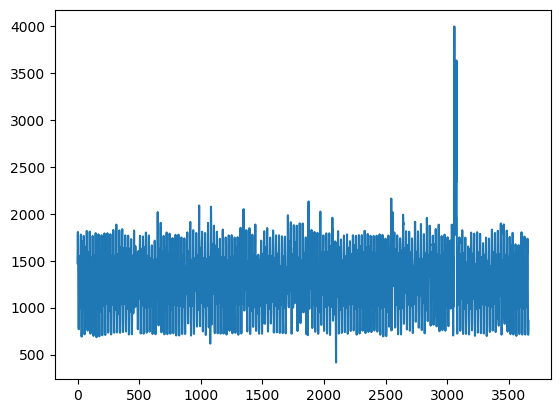

In [192]:
plt.plot(pre)
plt.show()

In [32]:
test_X

,予報日,予報値_鈴鹿市,予報値_鈴鹿市,予報値_四日市市,0,降雨量鈴鹿市
0,2019-05-01 20:59:59.999997,15.6,0.0,81.0,21.0,0.0
1,2019-05-01 21:59:59.999997,15.0,0.0,81.0,22.0,0.0
2,2019-05-01 22:59:59.999997,14.8,0.0,81.0,23.0,0.0
3,2019-05-02 00:00:00.000000,14.5,0.0,81.0,0.0,0.0
4,2019-05-02 00:59:59.999997,14.1,0.0,82.0,1.0,0.0
...,...,...,...,...,...,...
3619,NaT,NaN,NaN,NaN,NaN,0.2
3620,NaT,NaN,NaN,NaN,NaN,0.2
3621,NaT,NaN,NaN,NaN,NaN,0.2
3622,NaT,NaN,NaN,NaN,NaN,0.1


In [263]:
data_city.鈴鹿市[np.in1d(data_city.timestamp, pd.to_datetime(time_))]

7316    1519
7317    1631
7318    1753
7319    1831
7320    1779
7321    1601
7322    1320
7323    1124
7324     908
7325     778
7326     774
7327     888
7328    1133
7329    1543
7330    1647
7331    1561
7332    1468
7333    1329
7334    1289
7335    1239
7336    1175
7337    1123
7338    1132
7339    1223
Name: 鈴鹿市, dtype: object

In [193]:
np.asarray(test_X.index[~test_X.fillna("nan").applymap(np.isreal).all(1)])

array([], dtype=int64)

In [ ]:
np.asarray(temp_set_a.index[temp_set_a[temp_set_a.isna()].any(axis=1)])

In [ ]:
temp_set_a.index[temp_set_a.isna().any(axis=1)]

In [ ]:
array_nan1 = np.asarray(temp_set_a.index[~temp_set_a.fillna("nan").applymap(np.isreal).all(1)])
array_nan2 = np.asarray(rain_set_a.index[~rain_set_a.fillna("nan").applymap(np.isreal).all(1)])
array_nan3 = np.asarray(hum_set_a.index[~hum_set_a.fillna("nan").applymap(np.isreal).all(1)])
array_nan = np.unique(np.concatenate([array_nan1,array_nan2,array_nan3],0))
temp_set_a.drop(index=array_nan).予報日.dt.round("min")

In [ ]:
a = np.asarray(temp_set_a.index[~temp_set_a.fillna("nan").applymap(np.isreal).all(1)])

In [ ]:
b = np.asarray(rain_set_b.index[~rain_set_b.fillna("nan").applymap(np.isreal).all(1)])

In [ ]:
np.unique(np.concatenate([a,b],0))

In [ ]:
np.asarray(train_Y.index[~train_Y.fillna("nan").applymap(np.isreal).all(1)])

In [ ]:
test_X = pd.concat([temp_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index"),
    rain_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1),
    hum_set[(test_time >= test_time[i]) & (test_time < test_time[i+12])].reset_index().drop(columns="index").drop(["予報日"], axis=1), 
    pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")],axis=1)
test_X = pd.concat([test_X.iloc[:, [0,3,9,14,17]], hum_old3[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")], axis=1)

In [ ]:
test_X

In [ ]:
pd.DataFrame(timestep)[(data_city.timestamp >= test_time[i]) & (data_city.timestamp < test_time[i+12])].reset_index().drop(columns="index")

In [ ]:
#print(test_time)
#test_time.dt.time[0]
9 10 11 12 13 14 15 16 17 18 19 20 ##21

In [ ]:
weather_rain

In [ ]:
weather_rain[data_city.timestamp.dt.date <= test_time[i]].drop(["timestamp"], axis=1)